In [1]:
### Template for Gaussian process using the binary data sets of Co, Cu, Fe @ Zr and reaction conditions ###

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
tf.__version__

'2.12.1'

In [2]:
#np.random.seed(404)
np.set_printoptions(precision=3, suppress=True)

In [3]:
# Read data
data = pd.read_excel('HAS_model_data_all.xlsx', index_col=False)
data.head()

,Zr,Cu,Co,Fe,T [◦C],H2:CO,GHSV [cm3 h-1 gcat-1],STY,SCO2 [%],SCH4 [%],SHA [%],XCO [%],Yield [%],S1,S2,SM
0,0.1010,0.478,0.213,0.208,250.0,2.0,24000.0,100.003278,0.076644,0.273432,0.140335,0.128342,0.018011,-27.343151,-7.664434,-35.007585
1,0.1010,0.478,0.213,0.208,260.0,2.0,24000.0,158.555963,0.080691,0.259485,0.144916,0.130594,0.018925,-25.948469,-8.069144,-34.017613
2,0.1010,0.202,0.480,0.217,250.0,2.0,24000.0,148.357606,0.046631,0.175814,0.110786,0.200434,0.022205,-17.581386,-4.663127,-22.244513
3,0.1010,0.202,0.480,0.217,260.0,2.0,24000.0,220.116161,0.057023,0.178532,0.107552,0.237733,0.025569,-17.853230,-5.702284,-23.555514
4,0.0966,0.201,0.230,0.465,250.0,2.0,24000.0,184.530234,0.087643,0.217867,0.156100,0.147239,0.022984,-21.786678,-8.764332,-30.551010


In [4]:
data = data.fillna(value=0)

In [5]:
data.shape

(125, 16)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Zr                     125 non-null    float64
 1   Cu                     125 non-null    float64
 2   Co                     125 non-null    float64
 3   Fe                     125 non-null    float64
 4   T [◦C]                 125 non-null    float64
 5   H2:CO                  125 non-null    float64
 6   GHSV [cm3 h-1 gcat-1]  125 non-null    float64
 7   STY                    125 non-null    float64
 8   SCO2 [%]               125 non-null    float64
 9   SCH4 [%]               125 non-null    float64
 10  SHA [%]                125 non-null    float64
 11  XCO [%]                125 non-null    float64
 12  Yield [%]              125 non-null    float64
 13  S1                     125 non-null    float64
 14  S2                     125 non-null    float64
 15  SM    

In [7]:
data.columns

Index(['Zr ', 'Cu ', 'Co ', 'Fe', 'T [◦C]', 'H2:CO', 'GHSV [cm3 h-1 gcat-1]',
       'STY', 'SCO2 [%]', 'SCH4 [%]', 'SHA [%]', 'XCO [%]', 'Yield [%]', 'S1',
       'S2', 'SM'],
      dtype='object')

In [8]:
# General stastistical data
data.describe()

,Zr,Cu,Co,Fe,T [◦C],H2:CO,GHSV [cm3 h-1 gcat-1],STY,SCO2 [%],SCH4 [%],SHA [%],XCO [%],Yield [%],S1,S2,SM
count,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000
mean,0.148342,0.157925,0.185653,0.507994,264.201010,2.104129,38575.135209,367.851337,0.140217,0.250724,0.101868,0.264870,0.029594,-25.072450,-14.021670,-39.094120
std,0.140613,0.142209,0.109020,0.208375,14.180151,0.438095,22520.668825,274.734323,0.060410,0.050094,0.048417,0.207479,0.019608,5.009447,6.040982,6.099748
min,0.048000,0.049000,0.049000,0.048463,233.900000,1.150000,10250.000000,7.965328,0.032156,0.175814,0.000000,0.000000,0.000000,-52.801336,-30.324824,-58.722450
25%,0.089707,0.080802,0.112749,0.359000,250.000000,2.000000,24000.000000,159.219162,0.087818,0.222696,0.090256,0.100801,0.012776,-27.066980,-18.794184,-42.994675
50%,0.101033,0.102313,0.183000,0.597000,260.000000,2.000000,24000.000000,295.556542,0.135113,0.241913,0.112751,0.237733,0.032896,-24.191257,-13.511309,-38.697790
75%,0.128000,0.140605,0.214183,0.651355,278.256887,2.210000,47200.000000,519.612382,0.187942,0.270670,0.138261,0.412088,0.046570,-22.269568,-8.781834,-35.007585
max,0.846036,0.664000,0.480000,0.807000,314.300000,3.150000,90000.000000,1098.461455,0.303248,0.528013,0.168707,0.940109,0.076763,-17.581386,-3.215591,-22.244513


In [9]:
# Define X and y from the data

X = data[['Zr ', 'Cu ', 'Co ', 'Fe','T [◦C]','H2:CO','GHSV [cm3 h-1 gcat-1]']]
Y = data[['STY','SM']] #SM is the summed selecvitiy of CO2 and CH4 ((SCO2+CH4). The SM values are given a negative values to show satify modeling constraints


In [10]:
Y

,STY,SM
0,100.003278,-35.007585
1,158.555963,-34.017613
2,148.357606,-22.244513
3,220.116161,-23.555514
4,184.530234,-30.551010
...,...,...
120,379.468383,-36.780817
121,1040.932331,-40.447574
122,381.730736,-30.683580
123,744.558150,-36.671757


<Axes: >

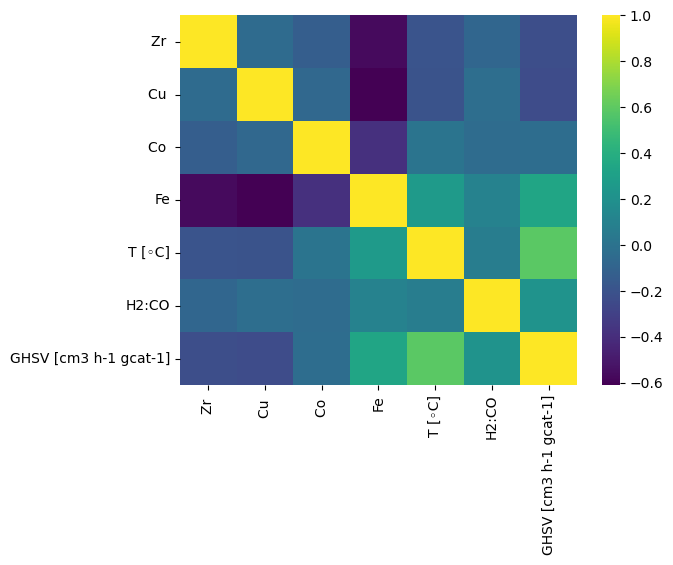

In [11]:
# Visualize correlation plot of the features
sns.heatmap(X.corr(), cmap='viridis')

In [12]:
# Feature normalization for X, applied to X

from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler(feature_range=(0,1))
mm.fit(np.array(X)[:,4:])

def scalex(x):
    x = np.array(x)
    x[:,4:] = mm.transform(x[:,4:])
    return x

def scalex_const(x_const):
    x_const = np.array(x_const)
    x_const = mm.transform(x_const)
    return x_const

X = scalex(X)

In [13]:
# Feature standardization for Y, applied to Y
# Invert y by multiplying with -1 to form a minimization problem

from sklearn.preprocessing import StandardScaler

stc = StandardScaler()
stc.fit(np.array(Y))

def scaley(y):
    y_scaled = -1*stc.transform(np.array(y)) #BO by default is a minimizer. we inverse the y_values as we want to maximize STY and minimize SM (SCO2+CH4)
    return y_scaled

def scaley_inv(y_scaled):
    y = stc.inverse_transform(np.array(-1*y_scaled))
    return y

Y = scaley(Y)

In [14]:
Y

array([[ 0.979, -0.673],
       [ 0.765, -0.836],
       [ 0.802, -2.773],
       [ 0.54 , -2.558],
       [ 0.67 , -1.406],
       [ 0.357, -0.968],
       [ 0.652, -1.291],
       [ 0.326, -0.96 ],
       [ 0.762, -0.944],
       [ 0.458, -0.6  ],
       [ 0.559, -0.888],
       [ 0.23 , -0.293],
       [ 1.182,  0.437],
       [ 0.699, -1.386],
       [ 1.071, -1.137],
       [ 1.04 , -0.334],
       [ 0.895, -0.32 ],
       [ 0.525, -1.147],
       [ 0.095, -0.484],
       [ 0.533, -0.944],
       [ 0.191, -0.217],
       [ 1.315,  3.231],
       [ 1.295,  2.177],
       [ 1.303,  1.396],
       [ 1.275,  0.642],
       [ 1.08 , -0.705],
       [ 0.962, -0.252],
       [ 0.41 , -0.458],
       [ 0.1  ,  0.234],
       [ 0.265, -0.504],
       [-0.072,  0.447],
       [ 0.393, -0.704],
       [ 0.09 ,  0.144],
       [ 1.216, -0.208],
       [ 1.139,  0.109],
       [ 1.218,  0.468],
       [ 1.124, -0.498],
       [ 0.592, -0.627],
       [ 0.248,  0.119],
       [ 0.398, -0.454],


In [15]:
## Gaussian process regression 
from gpflow.models import GPR
from gpflow.models import SVGP
from gpflow.likelihoods import Gaussian
from gpflow.optimizers import Scipy
from gpflow.kernels import SquaredExponential as SE, Constant as C, White as W, SharedIndependent as SI
from gpflow.inducing_variables import SharedIndependentInducingVariables as SIIV, InducingPoints as IP

# objective with 4 metals + reaction conditions
kernel = SE(lengthscales=[0.1,0.1,0.1,0.1,0.1,0.1,0.1])

# Gaussian process regression
gp = GPR((X, Y), kernel=kernel)

# Optimization
opt = Scipy()
opt.minimize(gp.training_loss, gp.trainable_variables)

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 109.62295916519207
        x: [-1.704e+00 -1.540e+00 -9.059e-01  3.540e+02 -7.673e-01
             3.472e-01 -6.010e-01  1.103e+00 -3.345e+00]
      nit: 63
      jac: [ 6.458e-04  1.121e-04  5.978e-04 -3.466e-09  1.268e-03
             8.142e-05 -6.549e-04 -7.416e-04 -1.320e-03]
     nfev: 77
     njev: 77
 hess_inv: <9x9 LbfgsInvHessProduct with dtype=float64>

In [16]:
# Optimized kernel parameters

from gpflow.utilities import print_summary
gp.kernel.parameters

(<Parameter: name=softplus, dtype=float64, shape=[7], fn="softplus", numpy=array([  0.167,   0.194,   0.339, 354.001,   0.381,   0.882,   0.437])>,
 <Parameter: name=softplus, dtype=float64, shape=[], fn="softplus", numpy=1.3892744706273767>)

# Bayesian optimization

In [17]:
# Defining the Constraints

from trieste.space import LinearConstraint
from trieste.space import Box

# Define lower and upper bounds for metal fractions, temperature, CO/H2 ratio and GHSV
Zr_lb = 0.1
Zr_ub = 0.1
Cu_lb = 0.05
Cu_ub = 0.2
Co_lb = 0.05
Co_ub = 0.5
Fe_lb = 0.3
Fe_ub = 0.8
T_lb = 220
T_ub = 300
H2_CO_lb = 1
H2_CO_ub = 3
GHSV_lb = 30000
GHSV_ub = 80000

const_lb = -10
const_ub = 10

const_mat = np.array([T_lb, H2_CO_lb, GHSV_lb, T_ub, H2_CO_ub, GHSV_ub]).reshape(2,3)
print(const_mat)
const_mat = scalex_const(const_mat)
print(const_mat)

T_lb = const_mat[0,0]
T_ub = const_mat[1,0]
H2_CO_lb = const_mat[0,1]
H2_CO_ub = const_mat[1,1]
GHSV_lb = const_mat[0,2]
GHSV_ub = const_mat[1,2]


# Define linear constraints. Apply lb and ub to the scalar product of the number vector and the feature vector
# Metal compositions + reaction conditions

constraints = [LinearConstraint(A=tf.constant
       ([[1, 1, 1, 1, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0], 
        [0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 1]]), 
                                
        lb=tf.constant([1, Zr_lb, Cu_lb, Co_lb, Fe_lb, T_lb, H2_CO_lb, GHSV_lb]), 
        ub=tf.constant([1, Zr_ub, Cu_ub, Co_ub, Fe_ub, T_ub, H2_CO_ub, GHSV_ub]))]

constrained_search_space = Box([0, 0, 0, 0, const_lb, const_lb, const_lb], 
                               [1, 1, 1, 1, const_ub, const_ub, const_ub], 
                               constraints=constraints)


[[  220     1 30000]
 [  300     3 80000]]
[[-0.173 -0.075  0.248]
 [ 0.822  0.925  0.875]]


In [18]:
# Functions for formatting data

from trieste.data import Dataset

def observer(in_):
    in_ = tf.convert_to_tensor(in_)
    out_, _ = gp.predict_y(in_)
    out_ = tf.convert_to_tensor(out_)
    return Dataset(in_, out_)

def initial_data(in_, out_):
    in_ = tf.convert_to_tensor(in_)
    out_ = tf.convert_to_tensor(out_)
    return Dataset(in_, out_)

In [19]:
# Build model

from trieste.models.gpflow import GaussianProcessRegression
from trieste.bayesian_optimizer import BayesianOptimizer
from trieste.acquisition.rule import EfficientGlobalOptimization
from trieste.acquisition.function import Fantasizer
from trieste.acquisition import LocalPenalization
from trieste.acquisition.function import ExpectedHypervolumeImprovement
from trieste.acquisition.function import ExpectedImprovement
from trieste.acquisition.function import PredictiveVariance

model = GaussianProcessRegression(gp, num_kernel_samples=10)

# Acquisition functions and rule

ehvi = ExpectedHypervolumeImprovement()
rule_ehvi = EfficientGlobalOptimization(builder=ehvi)

# Bayesian optimizer
bo = BayesianOptimizer(observer, constrained_search_space)


In [20]:
# Run the Bayesian optimizer
#rule_ehvi for multi-objective


batch_size = 30 # number of recommendations for experiments
bo_result = bo.optimize(batch_size, initial_data(X, Y), model, rule_ehvi, track_state = False, fit_initial_model=False) # multi-objective

C:\Users\msuvarna\Anaconda3\envs\CE_demo\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


Optimization completed without errors


In [21]:
# Get results from the Bayesian optimizer
bo_initial_data = bo_result.try_get_final_dataset()
bo_X = bo_result.try_get_final_dataset().query_points.numpy()[-batch_size:,:]

bo_X[:,4:] = mm.inverse_transform(bo_X[:,4:]) 

bo_Y = bo_result.try_get_final_dataset().observations.numpy()[-batch_size:,:]
np.set_printoptions(precision=3, suppress=True)

result=(np.concatenate((bo_X, scaley_inv(bo_Y)), axis=1))


In [22]:
#Create dataframe with results 

dfresult = pd.DataFrame(result, columns = ['Zr','Cu','Co','Fe','T','H2:CO','GHSV','STY','S(CO2+CH4)'])
dfresult

,Zr,Cu,Co,Fe,T,H2:CO,GHSV,STY,S(CO2+CH4)
0,0.1,0.137719,0.462281,0.300000,260.520923,1.418642,44194.048602,273.788955,-23.206292
1,0.1,0.050001,0.050002,0.799997,267.634650,1.000007,79999.977065,765.261901,-35.474779
2,0.1,0.100000,0.500000,0.300000,268.453943,1.238999,45218.701618,335.461013,-26.882577
3,0.1,0.050000,0.050000,0.800000,256.266594,1.800621,80000.000499,615.977650,-33.854270
4,0.1,0.050000,0.050000,0.800000,279.769148,1.322014,79999.999781,993.454214,-38.921790
5,0.1,0.171004,0.428996,0.300000,256.426790,1.368061,43583.973845,205.285754,-21.780513
6,0.1,0.050000,0.050000,0.800000,288.223119,1.676211,79999.999053,1092.979622,-42.960154
7,0.1,0.050000,0.050000,0.800000,272.481660,1.310985,79999.996045,893.422568,-36.902159
8,0.1,0.100000,0.500000,0.300000,260.053932,1.735017,43567.634853,325.880672,-26.530568
9,0.1,0.130669,0.469331,0.300000,278.531797,1.000004,46735.925603,336.471579,-28.775939
